In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import globals as gl

from vis import lineplot_roi_avg

plt.style.use('default')

Base directory found: /cifs/diedrichsen/data/Chord_exp/EFC_learningfMRI
Atlas directory found: /cifs/diedrichsen/data/Atlas_templates/fs_LR_32


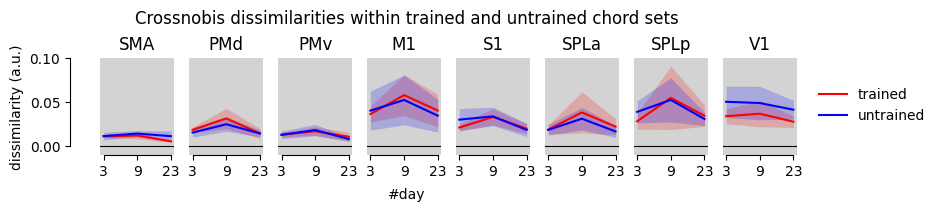

In [2]:
H = 'L'
rois = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']
df = pd.read_csv(os.path.join(gl.baseDir, gl.pcmDir, f'dissimilarity.tsv'), sep='\t')
df_melt = df.melt(id_vars=['day', 'roi', 'Hem', 'sn'], var_name='chord', value_name='crossnobis_within', value_vars=['crossnobis_trained', 'crossnobis_untrained'])
fig, axs = plt.subplots(1, len(rois), sharey=True, sharex=True, figsize=(8, 2), constrained_layout=True)
fig, axs = lineplot_roi_avg(fig, axs, df_melt, metric='crossnobis_within', H='L', rois=rois, color=['red', 'blue'], label=['trained', 'untrained'], hue='chord')
axs[0].set_ylim((-.01, .1))
axs[0].spines['left'].set_bounds((0, .1))
axs[0].set_ylabel('dissimilarity (a.u.)')
fig.supxlabel('#day', fontsize=10)
fig.suptitle('Crossnobis dissimilarities within trained and untrained chord sets')
plt.show()

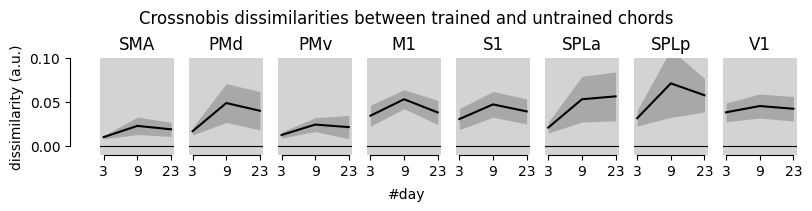

In [3]:
H = 'L'
rois = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']
df = pd.read_csv(os.path.join(gl.baseDir, gl.pcmDir, f'dissimilarity.tsv'), sep='\t')
fig, axs = plt.subplots(1, len(rois), sharex=True, sharey=True, figsize=(8, 2), constrained_layout=True)
fig, axs = lineplot_roi_avg(fig, axs, df, metric='crossnobis_between', H='L', rois=rois, color='k')
axs[0].set_ylim((-.01, .1))
axs[0].set_ylabel('dissimilarity (a.u.)')
axs[0].spines['left'].set_bounds((0, .1))
fig.suptitle('Crossnobis dissimilarities between trained and untrained chords')
fig.supxlabel('#day', fontsize=10)
plt.show()

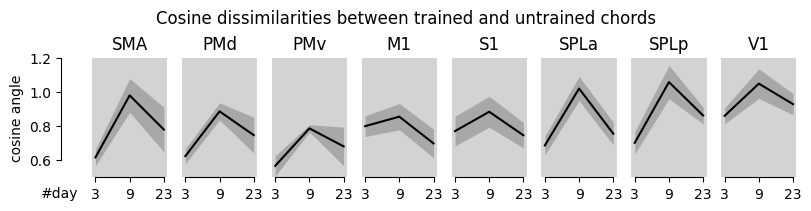

In [4]:
H = 'L'
rois = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']
df = pd.read_csv(os.path.join(gl.baseDir, gl.pcmDir, f'dissimilarity.tsv'), sep='\t')
fig, axs = plt.subplots(1, len(rois), sharex=True, sharey=True, figsize=(8, 2), constrained_layout=True)
fig, axs = lineplot_roi_avg(fig, axs, df, metric='cosine_between', H='L', rois=rois, color='k')
axs[0].set_ylim((.5, 1.2))
axs[0].spines['left'].set_bounds((.6, 1.2))
axs[0].set_ylabel('cosine angle')
axs[0].text(-.5, -.08, '#day', ha='right', va='top', transform=axs[0].get_xaxis_transform())
fig.suptitle('Cosine dissimilarities between trained and untrained chords')
plt.show()